In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dataset/FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [3]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

In [4]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 ...
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]


In [5]:
clf = linear_model.LinearRegression()
result = clf.fit(train_x_poly, train_y)
print(clf.coef_, clf.intercept_)

[[ 0.         48.83695697 -1.27030387]] [109.42220622]


Text(0, 0.5, 'Emission')

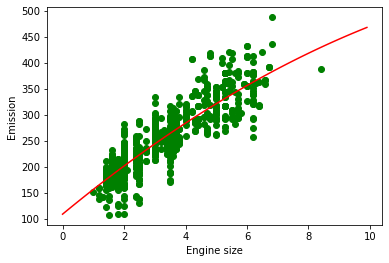

In [6]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
x = np.arange(0.0, 10.0, 0.1)
y = clf.intercept_[0]+ clf.coef_[0][1]*x+ clf.coef_[0][2]*np.power(x, 2)
plt.plot(x, y,'-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [7]:
test_x_poly = poly.fit_transform(test_x)
y_hat = clf.predict(test_x_poly)
mae = np.mean(np.absolute(y_hat-test_y))
mse = np.mean((y_hat-test_y)**2)
r2 = r2_score(y_hat, test_y)
print("MAE: %.2f" % mae)
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

MAE: 22.65
MSE: 884.27
R2: 0.74
